## Quina

Neste projeto iremos analisar os resultados de jogos da Quina que paga milhões para o acertador dos 5 números sorteados. Ainda é possível ganhar prêmios ao acertar 4, 3 ou 2 números dentre os 80 disponíveis no volante de apostas. Para realizar o sonho de ser o próximo milionário, você deve marcar de 5 a 15 números do volante

### Premiação

__O prêmio bruto corresponde a 43,35% da arrecadação.__ 

Deste valor:
- 35% são distribuídos entre os acertadores dos 5 números,
- 19% entre os acertadores de 4 números,
- 20% entre os acertadores de 3 números,
- 11% entre os acertadores de 2 números e
- 15% acumulam para os acertadores dos 5 números da Quina de São João.

### Downloads
- Informações sobre a [Quina](http://loterias.caixa.gov.br/wps/portal/loterias/landing/quina)
- Arquivo de [Dados](http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_quina.zip)

![Quina](quina.png)

In [1]:
# Importando as bibliotecas que iremos utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palpita import palpite

%matplotlib inline

In [2]:
# Carregando o arquivo, neste caso o arquivo veio em formato HTML

quina = pd.read_html('D_QUINA.htm')

In [3]:
# Arquivo carregado como lista, iremos conferir suas 5 primeiras linhas
quina[0][:5]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,Arrecadacao_Total,Ganhadores_Quina,Cidade,...,Ganhadores_Quadra,Rateio_Quadra,Ganhadores_Terno,Rateio_Terno,Ganhadores_Duque,Rateio_Duque,Acumulado,Valor_Acumulado,Estimativa_Premio,Valor_Acumulado_Sorteio_Especial_São_João
1,1,13/03/1994,25,45,60,76,79,000,3,&nbsp,...,127,1.788.92700,7030,42.98200,0,000,NÃO,000,000,000
2,2,17/03/1994,13,30,58,63,64,000,1,&nbsp,...,105,1.128.56500,4861,32.42200,0,000,NÃO,000,000,000
3,3,20/03/1994,05,15,32,33,48,000,1,&nbsp,...,232,664.84600,10196,20.12000,0,000,NÃO,000,000,000
4,4,24/03/1994,27,57,60,61,77,000,1,&nbsp,...,78,1.592.11900,4033,40.95400,0,000,NÃO,000,000,000


In [4]:
# Iremos remover as colunas que não serão utilizadas em nossa analise
colunas = [7,9,10,14,15,16,17,18,20,21]
quina[0].drop(columns=colunas, inplace=True)

In [5]:
# Conferindo a mudança feita
quina[0][:5]

,0,1,2,3,4,5,6,8,11,12,13,19
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,13/03/1994,25,45,60,76,79,3,75.731.22500,127,1.788.92700,000
2,2,17/03/1994,13,30,58,63,64,1,118.499.39700,105,1.128.56500,000
3,3,20/03/1994,05,15,32,33,48,1,154.244.27000,232,664.84600,000
4,4,24/03/1994,27,57,60,61,77,1,124.185.24600,78,1.592.11900,000


In [6]:
# Iremos criar um df recebendo as informações da posição 0 da lista

df = pd.DataFrame(quina[0]).copy()

In [7]:
# Lendo o inicio do DF

df.head()

,0,1,2,3,4,5,6,8,11,12,13,19
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,13/03/1994,25,45,60,76,79,3,75.731.22500,127,1.788.92700,000
2,2,17/03/1994,13,30,58,63,64,1,118.499.39700,105,1.128.56500,000
3,3,20/03/1994,05,15,32,33,48,1,154.244.27000,232,664.84600,000
4,4,24/03/1994,27,57,60,61,77,1,124.185.24600,78,1.592.11900,000


In [8]:
# Como o df não foi criado com os nomes das colunas e elas estão listadas na linha 0
# iremos atualizar o nome das colunas

df.columns = df.loc[0]

In [9]:
# Renomeando as colunas para facilitar as consultas

df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('ª','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('_dezena','')
df.columns

Index(['concurso', 'data_sorteio', '1', '2', '3', '4', '5', 'ganhadores_quina',
       'rateio_quina', 'ganhadores_quadra', 'rateio_quadra',
       'valor_acumulado'],
      dtype='object', name=0)

In [10]:
# Conferindo a mudança

df.head()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
0,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Valor_Acumulado
1,1,13/03/1994,25,45,60,76,79,3,75.731.22500,127,1.788.92700,000
2,2,17/03/1994,13,30,58,63,64,1,118.499.39700,105,1.128.56500,000
3,3,20/03/1994,05,15,32,33,48,1,154.244.27000,232,664.84600,000
4,4,24/03/1994,27,57,60,61,77,1,124.185.24600,78,1.592.11900,000


In [11]:
# Removendo a primeira linha 

df.drop([0], inplace=True)

In [12]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
1,1,13/03/1994,25,45,60,76,79,3,75.731.22500,127,1.788.92700,000
2,2,17/03/1994,13,30,58,63,64,1,118.499.39700,105,1.128.56500,000
3,3,20/03/1994,05,15,32,33,48,1,154.244.27000,232,664.84600,000
4,4,24/03/1994,27,57,60,61,77,1,124.185.24600,78,1.592.11900,000
5,5,27/03/1994,19,44,53,54,71,1,147.595.71500,137,1.077.34100,000


In [13]:
df.tail()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
6642,4866,03/01/2019,71,63,75,30,04,0,000,36,12.49543,2.748.84358
6643,4867,04/01/2019,73,61,06,30,24,1,3.716.16944,58,9.05379,000
6644,4868,05/01/2019,50,04,09,72,62,0,000,35,10.02228,646.17356
6645,4869,07/01/2019,06,67,73,21,52,0,000,70,5.78716,1.392.41172
6646,4870,08/01/2019,07,16,55,49,31,0,000,69,6.44630,2.211.77079


### Dados nulos

In [14]:
df.shape

(6646, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6646 entries, 1 to 6646
Data columns (total 12 columns):
concurso             5172 non-null object
data_sorteio         6646 non-null object
1                    4870 non-null object
2                    4870 non-null object
3                    4870 non-null object
4                    4870 non-null object
5                    4870 non-null object
ganhadores_quina     4870 non-null object
rateio_quina         4870 non-null object
ganhadores_quadra    4870 non-null object
rateio_quadra        4870 non-null object
valor_acumulado      4870 non-null object
dtypes: object(12)
memory usage: 675.0+ KB


A coluna __data_sorteio__ possui mais linhas que as outras e também a coluna __concurso__

In [16]:
df['data_sorteio'].value_counts()[:10]

SP    734
RJ    242
MG    169
RS    137
PR    101
SC     79
DF     42
GO     35
PE     29
BA     28
Name: data_sorteio, dtype: int64

Podemos ver que na coluna __data_sorteio__ temos informações _quebradas_ que vieram da coluna UF, iremos remover estas linhas do DF

In [17]:
# Removendo os valores nulos

df.dropna(subset=['1'], how="any", inplace=True)

In [18]:
# Reindexando as linhas

df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado
0,1,13/03/1994,25,45,60,76,79,3,75.731.22500,127,1.788.92700,000
1,2,17/03/1994,13,30,58,63,64,1,118.499.39700,105,1.128.56500,000
2,3,20/03/1994,05,15,32,33,48,1,154.244.27000,232,664.84600,000
3,4,24/03/1994,27,57,60,61,77,1,124.185.24600,78,1.592.11900,000
4,5,27/03/1994,19,44,53,54,71,1,147.595.71500,137,1.077.34100,000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 12 columns):
concurso             4870 non-null object
data_sorteio         4870 non-null object
1                    4870 non-null object
2                    4870 non-null object
3                    4870 non-null object
4                    4870 non-null object
5                    4870 non-null object
ganhadores_quina     4870 non-null object
rateio_quina         4870 non-null object
ganhadores_quadra    4870 non-null object
rateio_quadra        4870 non-null object
valor_acumulado      4870 non-null object
dtypes: object(12)
memory usage: 456.6+ KB


Agora todas as colunas possuem a mesma quantidade de linhas

### Tipagem

A coluna data_sorteio será convertida para datetime, rateios para float e as demais para inteiro

In [21]:
# Convertendo a coluna data_sorteio para datetime
df['data_sorteio'] = pd.to_datetime(df['data_sorteio'])

In [22]:
# Inserindo uma coluna com o ano de cada sorteio

df['ano'] = df['data_sorteio'].dt.year

#### Problemas com as casas decimais
Ao analisar os valores nos passos futuros, verificamos que as casas decimais ficaram a esquerda do .
Para resolver a questão iremos e remover os dois ultimos numeros, descartando o valor dos decimais, como estamos trabalhando com valores na casa dos __milhões__ alguns __centavos__ não atrapalham nossos resultados.

In [23]:
# Colunas que possuem os valores que serão tratados
colunas_valores = ['rateio_quina','rateio_quadra','valor_acumulado'] #colunas que serão convertidas para float

In [24]:
# Criando uma copia de cada coluna para o caso de erros na conversão ser fácil a recuperação
pos = 0
copia = pd.DataFrame()
for coluna in colunas_valores:
    copia[coluna] = df[coluna]
    pos += 1

In [25]:
# Conferindo se a copia foi feita

for coluna in colunas_valores:
    print(copia[coluna].head(3))

0     75.731.22500
1    118.499.39700
2    154.244.27000
Name: rateio_quina, dtype: object
0    1.788.92700
1    1.128.56500
2      664.84600
Name: rateio_quadra, dtype: object
0    000
1    000
2    000
Name: valor_acumulado, dtype: object


In [26]:
# Trabalhando com os valores

for coluna in colunas_valores:
    df[coluna] = df[coluna].str.replace('.','') #removendo o . dos valores

In [27]:
df.head()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
0,1,1994-03-13,25,45,60,76,79,3,7573122500,127,178892700,000,1994
1,2,1994-03-17,13,30,58,63,64,1,11849939700,105,112856500,000,1994
2,3,1994-03-20,05,15,32,33,48,1,15424427000,232,66484600,000,1994
3,4,1994-03-24,27,57,60,61,77,1,12418524600,78,159211900,000,1994
4,5,1994-03-27,19,44,53,54,71,1,14759571500,137,107734100,000,1994


In [28]:
# Removendo o dois ultimos numeros das colunas de ratio

for coluna in colunas_valores:
    temp = df[coluna].copy() #criando uma copia temporaria das informações da coluna
    pos = 0 #variavel criada para posicionar a atualização
    for valor in temp: #para cada valor
        temp[pos] = valor[:-2] #atualizar o valor para ele mesmo removendo sem as ultimas duas posições
        pos += 1 
    df[coluna] = temp #copiar o conteudo da copia temporaria para a coluna

In [29]:
# Conferindo os valores
df.head()

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
0,1,1994-03-13,25,45,60,76,79,3,75731225,127,1788927,0,1994
1,2,1994-03-17,13,30,58,63,64,1,118499397,105,1128565,0,1994
2,3,1994-03-20,05,15,32,33,48,1,154244270,232,664846,0,1994
3,4,1994-03-24,27,57,60,61,77,1,124185246,78,1592119,0,1994
4,5,1994-03-27,19,44,53,54,71,1,147595715,137,1077341,0,1994


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 13 columns):
concurso             4870 non-null object
data_sorteio         4870 non-null datetime64[ns]
1                    4870 non-null object
2                    4870 non-null object
3                    4870 non-null object
4                    4870 non-null object
5                    4870 non-null object
ganhadores_quina     4870 non-null object
rateio_quina         4870 non-null object
ganhadores_quadra    4870 non-null object
rateio_quadra        4870 non-null object
valor_acumulado      4870 non-null object
ano                  4870 non-null int64
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 494.7+ KB


In [31]:
# Convertendo as colunas para inteiro

colunas_int = ['concurso','rateio_quina','rateio_quadra','1','2','3','4','5',
               'ganhadores_quina','ganhadores_quadra','valor_acumulado']

for coluna in colunas_int:
    df[coluna] = df[coluna].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 13 columns):
concurso             4870 non-null int32
data_sorteio         4870 non-null datetime64[ns]
1                    4870 non-null int32
2                    4870 non-null int32
3                    4870 non-null int32
4                    4870 non-null int32
5                    4870 non-null int32
ganhadores_quina     4870 non-null int32
rateio_quina         4870 non-null int32
ganhadores_quadra    4870 non-null int32
rateio_quadra        4870 non-null int32
valor_acumulado      4870 non-null int32
ano                  4870 non-null int64
dtypes: datetime64[ns](1), int32(11), int64(1)
memory usage: 285.4 KB


In [33]:
# 2.500.000.000
num_teste = 2500000000.00

### Funções

In [34]:
def formato_brl(valor):
    """
    Função para converter numeração para formato moeda BRL
    argumentos: valor = valor que será tratado
    retorna: valor formato     
    """
    temp = str(int(valor))[::-1]
    cont = 1
    novo_valor = ''
    for digito in temp:
        if cont == 4:
            novo_valor = '.' + novo_valor
            cont = 1
        novo_valor = digito + novo_valor
        cont += 1
    novo_valor = novo_valor + ',00'
    novo_valor = 'R$ ' + novo_valor
    return novo_valor

In [35]:
# Testando e conferindo a função
formato_brl(num_teste)

'R$ 2.500.000.000,00'

__Obs.:__ Depois de elaborar a função, localizei uma [artigo](http://blog.alura.com.br/formatando-moeda-no-python/) falando da biblioteca locale. [Exemplo](https://pt.stackoverflow.com/questions/66183/como-retornar-um-valor-no-formato-moeda-brasileiro-na-view-do-django) de aplicação da função para moeda brasileira.

__Como já elaborei a função, manterei o meu código utilizando ela__

### Analisando nosso DF

In [36]:
# Primeiro sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmin()]

0
concurso                              13
data_sorteio         1994-01-05 00:00:00
1                                     13
2                                     33
3                                     38
4                                     39
5                                     72
ganhadores_quina                       0
rateio_quina                           0
ganhadores_quadra                    115
rateio_quadra                    2006018
valor_acumulado                230692109
ano                                 1994
Name: 12, dtype: object

In [37]:
# Último sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmax()]

0
concurso                            4870
data_sorteio         2019-08-01 00:00:00
1                                      7
2                                     16
3                                     55
4                                     49
5                                     31
ganhadores_quina                       0
rateio_quina                           0
ganhadores_quadra                     69
rateio_quadra                       6446
valor_acumulado                  2211770
ano                                 2019
Name: 4869, dtype: object

In [38]:
# Menor valor pago

df.loc[df[df['rateio_quina'] != 0]['rateio_quina'].idxmin()]

0
concurso                            1157
data_sorteio         2003-10-06 00:00:00
1                                     10
2                                     28
3                                     78
4                                      7
5                                     62
ganhadores_quina                      23
rateio_quina                       14230
ganhadores_quadra                    345
rateio_quadra                        948
valor_acumulado                        0
ano                                 2003
Name: 1156, dtype: object

In [39]:
# Maior valor pago

index = df['rateio_quina'].idxmax()
df.loc[index]

0
concurso                              25
data_sorteio         1994-06-16 00:00:00
1                                      2
2                                     29
3                                     46
4                                     69
5                                     76
ganhadores_quina                       2
rateio_quina                   579215957
ganhadores_quadra                    174
rateio_quadra                    2667340
valor_acumulado                        0
ano                                 1994
Name: 24, dtype: object

In [40]:
# Maior valor pago para 1 unico ganhador

index = df.query('ganhadores_quina == 1')['rateio_quina'].idxmax()
df.loc[index]

0
concurso                              14
data_sorteio         1994-05-05 00:00:00
1                                     44
2                                     52
3                                     60
4                                     64
5                                     68
ganhadores_quina                       1
rateio_quina                   525124015
ganhadores_quadra                    106
rateio_quadra                    2777659
valor_acumulado                        0
ano                                 1994
Name: 13, dtype: object

In [41]:
# Total pago em premiões

valor = formato_brl(df['rateio_quina'].sum())
print('O valor TOTAL pago em premiações é de {}'
     .format(valor))

O valor TOTAL pago em premiações é de R$ 6.834.935.935,00


In [42]:
# Jogo com maior numero de ganhadores

index = df['ganhadores_quina'].idxmax
df.loc[index]

0
concurso                             211
data_sorteio         1996-06-16 00:00:00
1                                      3
2                                     11
3                                     19
4                                     31
5                                     39
ganhadores_quina                      24
rateio_quina                       15854
ganhadores_quadra                   1087
rateio_quadra                        350
valor_acumulado                        0
ano                                 1996
Name: 210, dtype: object

In [43]:
dividido = formato_brl(df['rateio_quina'].loc[index] / df['ganhadores_quina'].loc[index])
print('No sorteio com maior números de ganhadores, cada ganhador levou {}'
     .format(dividido))

No sorteio com maior números de ganhadores, cada ganhador levou R$ 660,00


### Valor ARRECADADO

Sabendo que o prêmio bruto corresponde a __43,35%__ da arrecadação, vamos verificar qual foi o __valor total__ arrecadado na maior premiação.

In [44]:
#convertendo o valor para int64 usando o numpy devido ao tamanho do valor final

valor = np.int64(df['rateio_quina'].max())
arrecadado = formato_brl(((valor * 100) / 43.3))

In [45]:
print('O maior valor de premiação foi de {}'
      .format(formato_brl(valor)))
print('O VALOR TOTAL arrecadado neste sorteio foi de {}'
     .format(arrecadado))

O maior valor de premiação foi de R$ 579.215.957,00
O VALOR TOTAL arrecadado neste sorteio foi de R$ 1.337.681.193,00


In [46]:
# E o valor TOTAL ARRECADO 

valor_total = np.int64(df['rateio_quina'].sum())
arrecadado_total = formato_brl((valor_total * 100) / 43.3)

In [47]:
print('O valor total de premiações foi de {}*'
     .format(formato_brl(valor_total)))
print('Isso corresponde a uma arrecadação total de {}*'
     .format(arrecadado_total))

O valor total de premiações foi de R$ 6.834.935.935,00*
Isso corresponde a uma arrecadação total de R$ 15.785.071.443,00*


_*calculos feitos sobre os valores pagos em premiações_

### Analisando os dados utilizando gráficos

In [48]:
# Agrupando por ano o total de ganhadores e valores pagos na QUINA

quina_ganhadores = df.groupby('ano')['ganhadores_quina'].sum()
quina_valores = df.groupby('ano')['rateio_quina'].sum()

In [49]:
# Agrupando por ano o total de ganhadores e valores pagos na QUADRA

quadra_ganhadores = df.groupby('ano')['ganhadores_quadra'].sum()
quadra_valores = df.groupby('ano')['rateio_quadra'].sum()

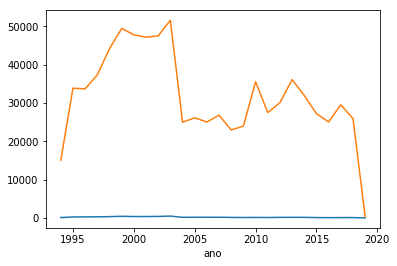

In [50]:
# Plotando um gráfico comparativo do ganhadores por tipo de prêmio

quina_ganhadores.plot()
quadra_ganhadores.plot()

O gráfico não ficou muito informativo devido a diferença entre os valores de cada tipo de ganhadores.
Para plotar um gráfico melhor, iremos utilizar a proporção de cada tipo de ganhadores.

In [51]:
# Proporções
# Totais

total_quina = df['ganhadores_quina'].sum()
valor_quina = df['rateio_quina'].sum()
total_quadra = df['ganhadores_quadra'].sum()
valor_quadra = df['rateio_quadra'].sum()

# Proporção

quina_ganhadores = quina_ganhadores / total_quina
quina_valores = quina_valores / valor_quina
quadra_ganhadores = quadra_ganhadores / total_quadra
quadra_valores = quadra_valores / valor_quadra

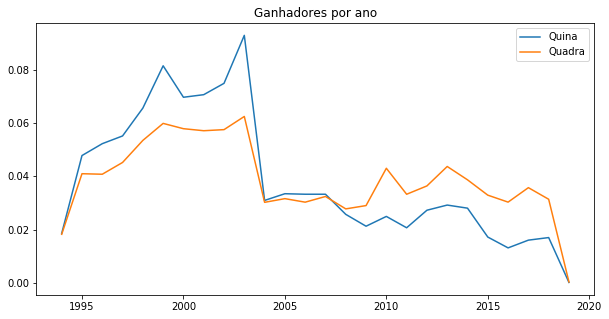

In [52]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

quina_ganhadores.plot(label='Quina', figsize=(10,5))
quadra_ganhadores.plot(label='Quadra')
plt.title('Ganhadores por ano')
plt.xlabel('')
plt.legend();

Podemos observar que os gráficos possuem desenho parecido ficando os números da __Quina__ acima dos da __Quadra__ até meados de 2004 e invertendo a partir de 2009 onde o número de ganhadores da __Quadra__ fica acima dos da __Quina__.

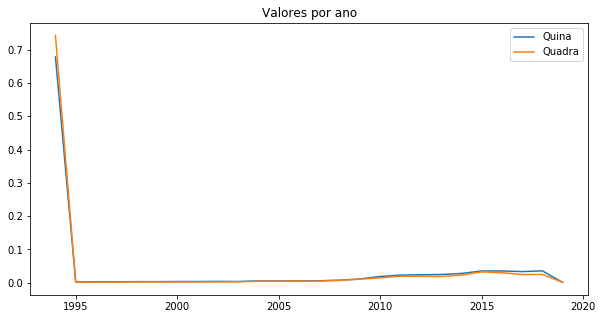

In [53]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

quina_valores.plot(label='Quina', figsize=(10,5))
quadra_valores.plot(label='Quadra')
plt.title('Valores por ano')
plt.xlabel('')
plt.legend();

Podemos observar uma queda de 1994 para 1995, provavelmente devido ao inicio dos registros e então passam a serguir uma linha uniforme.

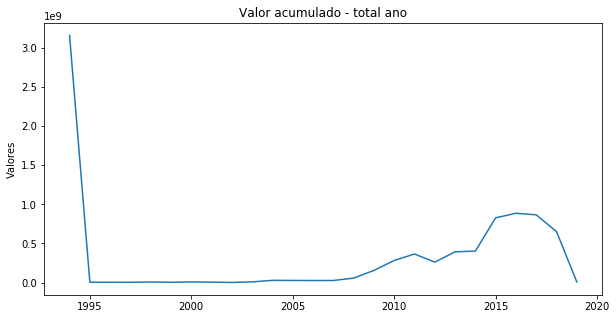

In [54]:
# Valor acumulado

valor_acumulado = df.groupby('ano')['valor_acumulado'].sum()
valor_acumulado.plot(figsize=(10,5))
plt.title('Valor acumulado - total ano')
plt.xlabel('')
plt.ylabel('Valores');

Não encontramos maiores informações sobre como funciona o __valor acumulado__ na mega sena, portando não podemos fazer maiores considerações, apenas que segue uma linha crescente apesar de toda a variação apresentada.

In [55]:
# Grafico com o VALOR ACUMULADO e premiações por categoria

In [56]:
# Fazendo a propoção do VALOR ACUMULADO

total_acumulado = df['valor_acumulado'].sum()
valor_acumulado = valor_acumulado / total_acumulado

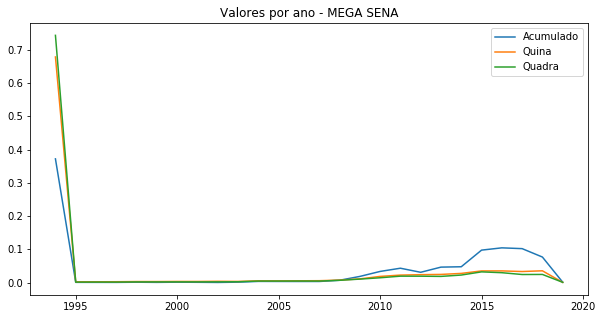

In [57]:
# Plotando o gráfico

valor_acumulado.plot(label='Acumulado', figsize=(10,5))
quina_valores.plot(label='Quina')
quadra_valores.plot(label='Quadra')
plt.title('Valores por ano - MEGA SENA')
plt.xlabel('')
plt.legend();

Observamos que o valor acumulado também segue padrão semelhante ao das premiações, pois apesar de não sabermos em detalhes, sabemos que existe relação entre o valor que acumula e as premiações

## Conclusão

Como observado nos dados expostos acima, seguiram uma trajetório de crescimento até _2015/2016_ e então iniciaram uma queda registrada até o momento.

A proporção de ganhadores na sena, quina e quadra seguem trajetória parecida entre si e assim como os valores apresentam uma queda a partir de 2015.

Com base nas informações da CAIXA, verificamos que o valor arrecadado é bem superior que o das premiações.

### Limitações

Nosso dataframe foi importado a partir de um arquivo _.htm_ e apresentou algumas inconsistencias durante a analise devido a algumas quebras de valores que foram interpretadas como quebra de linha.

- Para contornar o problema removemos as linhas criadas de forma a não afetar nossas analises

As colunas foram importadas como _string_ o que nos levou a realizar as devidas conversões:
- data_sorteio - convertida para datetime
- demais colunas - convertidas para int, mesmo as colunas que tratam de valores foram convertidas para int para facilitar a manipulação de valores altos, e por trabalharmos com valores na casa dos milhões e bilhões, o descarte dos centavos não afetam os resultados finais.

### Aqui iremos chamar a função PALPITE para elaborar palpites baseados no df

In [58]:
# Dados para elaboração do palpite
# Alterar apenas estas duas variaveis

palpitar = 2
bolas = 0

In [59]:
# Rodando a função com 
palpite(palpitar,bolas,5,df)

Palpite 1
9 - 27 - 79 - 56 - 53 - 

Palpite 2
9 - 18 - 73 - 54 - 80 - 



### Ultimo resultado de jogo

In [60]:
df.tail(1)

,concurso,data_sorteio,1,2,3,4,5,ganhadores_quina,rateio_quina,ganhadores_quadra,rateio_quadra,valor_acumulado,ano
4869,4870,2019-08-01,7,16,55,49,31,0,0,69,6446,2211770,2019


__Fabiano__ _Lima_ - 02/01/2019